 Step-by-step Plan

1. Import libraries and load CIFAR-10

2. Normalize and preprocess the data

3. Build the CNN model (baseline)

4. Compile and train the model

5. Evaluate the model

6. Add Dropout layers to reduce overfitting

7. Re-train and re-evaluate

8. Plot accuracy/loss curves

Step 1: Import Libraries and Load CIFAR-10

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Check dataset shapes
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training set shape: (50000, 32, 32, 3) (50000, 1)
Test set shape: (10000, 32, 32, 3) (10000, 1)


Step 2: Normalize and Preprocess the Data

The pixel values in CIFAR-10 images range from 0 to 255. We'll scale them to the [0, 1] range by dividing by 255. Also, since the labels are in the form (n, 1), we'll flatten them into a 1D array for simplicity.

In [2]:
# Normalize the pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Verify changes
print("x_train min/max:", x_train.min(), x_train.max())
print("y_train sample:", y_train[:10])


x_train min/max: 0.0 1.0
y_train sample: [6 9 9 4 1 1 2 7 8 3]


 Step 3: Build the CNN Model (Baseline)

We'll use:

2 Convolutional layers with ReLU + MaxPooling

Flatten → Dense (Fully connected) → Output layer (10 classes)

In [3]:
# Build the baseline CNN model
model = models.Sequential([
    # First Conv block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Conv block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

✅ Step 4: Compile and Train the Model

We'll use:

Loss: sparse_categorical_crossentropy (for integer labels)

Optimizer: adam

Metrics: accuracy

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 38ms/step - accuracy: 0.3803 - loss: 1.6933 - val_accuracy: 0.5601 - val_loss: 1.2380
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.5955 - loss: 1.1576 - val_accuracy: 0.6379 - val_loss: 1.0488
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.6473 - loss: 1.0179 - val_accuracy: 0.6262 - val_loss: 1.0861
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6804 - loss: 0.9174 - val_accuracy: 0.6452 - val_loss: 1.0312
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7021 - loss: 0.8529 - val_accuracy: 0.6768 - val_loss: 0.9410
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7226 - loss: 0.7971 - val_accuracy: 0.6842 - val_loss: 0.9385
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7431 - loss: 0.7394 - val_accuracy: 0.6803 - val_loss: 0.9595
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.7548 -

✅ Step 5: Evaluate the Model

This will give us the final test loss and accuracy:

In [5]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 4s - 12ms/step - accuracy: 0.6847 - loss: 0.9504

Test accuracy: 0.6847


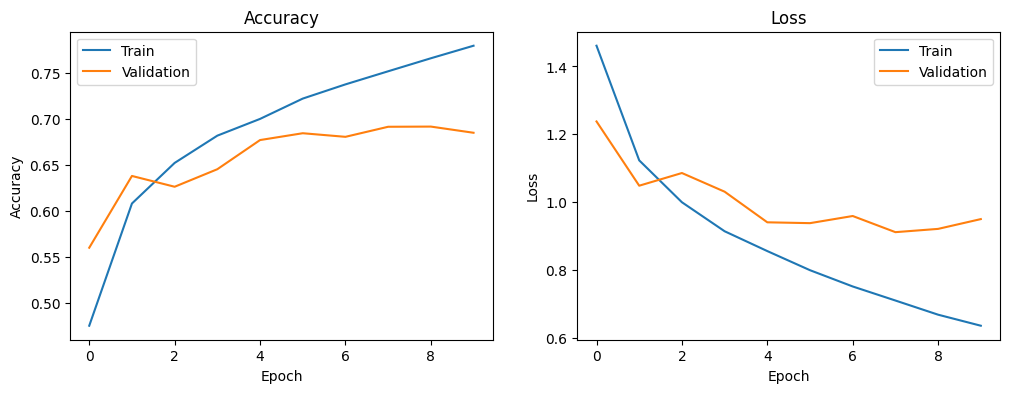

In [6]:
#  plot training vs. validation accuracy/loss to visualize performance:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


 Step 6: Add Dropout to the Model

We'll add Dropout after:

The first and second Conv blocks

The Dense layer before the output

This helps prevent the model from over-relying on specific neurons during training.

Here’s the updated model with Dropout:

In [7]:
# Build the CNN model with Dropout
model_dropout = models.Sequential([
    # First Conv block + Dropout
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Drop 25% of neurons

    # Second Conv block + Dropout
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Flatten + Dense + Dropout
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_dropout.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Show summary
model_dropout.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

✅ Step 7: Train the Model with Dropout

We'll train it for 10 epochs again, and include validation:

In [8]:
# Train the model with dropout
history_dropout = model_dropout.fit(x_train, y_train, epochs=10,
                                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.2394 - loss: 2.0198 - val_accuracy: 0.4914 - val_loss: 1.4634
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.4251 - loss: 1.5652 - val_accuracy: 0.5566 - val_loss: 1.3275
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4833 - loss: 1.4224 - val_accuracy: 0.5914 - val_loss: 1.1783
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5115 - loss: 1.3493 - val_accuracy: 0.6228 - val_loss: 1.1020
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.5354 - loss: 1.2959 - val_accuracy: 0.6256 - val_loss: 1.0769
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.5452 - loss: 1.2591 - val_accuracy: 0.6407 - val_loss: 1.0390
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5625 - loss: 1.2248 - val_accuracy: 0.6429 - val_loss: 1.0441
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.5776 -

Evaluate model with Dropout

In [9]:
# Evaluate the dropout model
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test, y_test, verbose=2)

print(f"\nTest accuracy with Dropout: {test_acc_dropout:.4f}")


313/313 - 3s - 11ms/step - accuracy: 0.6745 - loss: 0.9610

Test accuracy with Dropout: 0.6745


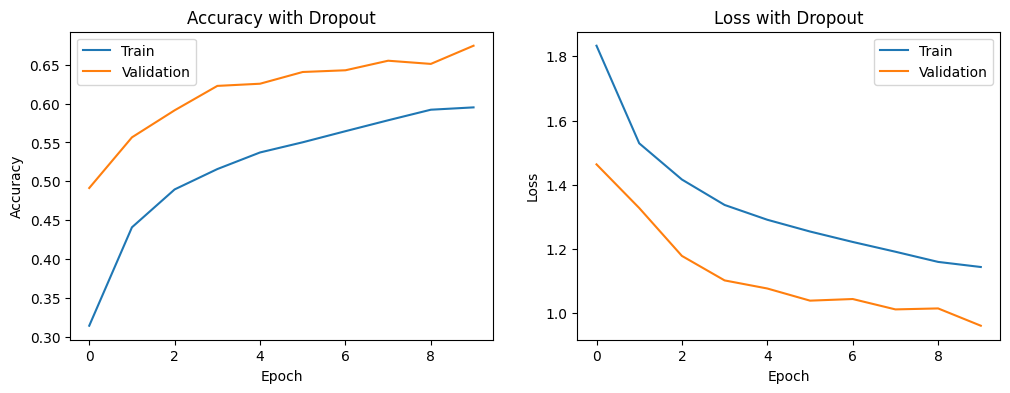

In [10]:
# Plot accuracy and loss for dropout model
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'], label='Train')
plt.plot(history_dropout.history['val_accuracy'], label='Validation')
plt.title('Accuracy with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'], label='Train')
plt.plot(history_dropout.history['val_loss'], label='Validation')
plt.title('Loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
